In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('../input/customer-life-time-value-prediction/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
pd.set_option('display.max_columns',None)
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

### There are no missing values in the dataset

In [ ]:
df.dtypes.value_counts()

In this Dataset customer Lifetime Value is the target variable.
1. Customer Lifetime Value is defined as, “The total value of direct and indirect contributions to overhead and profit by an individual customer during the entire customer lifecycle that is - from the start of the relationship until its projected ending”.
2. CLV evaluates the long-term value of customers with the company.
3. It is a powerful measure used not only to determine which clients have the most potential, but also to decide how much  marketing expenditures is justified for each segment.**

### Analyzing Target Variable

In [ ]:
df1 = df.copy(deep = True)
df['Customer Lifetime Value'].describe()

In [ ]:
from scipy import stats
from scipy.stats import norm,skew

sns.distplot(df1['Customer Lifetime Value'],fit=norm)

(mu,sigma) = norm.fit(df1['Customer Lifetime Value'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Customer Life Time Value Distribution')

## Q-Q PLOT
fig = plt.figure()
res = stats.probplot(df1['Customer Lifetime Value'],plot = plt)
plt.show()

#### The distribution plot indicates that the target variable is right skewed with a skewness of 3.03.
#### Indicates presence of outliers.
#### So it is important to transform it before applying linear models. I have applied log transformation on the target variable.

In [ ]:
df1['Customer Lifetime Value'] = np.log1p(df1['Customer Lifetime Value'])
sns.distplot(df1['Customer Lifetime Value'],fit=norm)

(mu,sigma) = norm.fit(df1['Customer Lifetime Value'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Customer Life Time Value Distribution')

## Q-Q PLOT
fig = plt.figure()
res = stats.probplot(df1['Customer Lifetime Value'],plot = plt)
plt.show()

In [ ]:
print('skewness before transformation:',df['Customer Lifetime Value'].skew())
print('skewness after transformation:',df1['Customer Lifetime Value'].skew())

In [ ]:
df1 = df1.drop(['Customer','Customer Lifetime Value','Effective To Date'],axis = 1)
df_cat1 = df1.select_dtypes(include = ['object'])
df_cat1.columns

In [ ]:
fig, axes = plt.subplots(round(len(df_cat1.columns) / 4), 4, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat1.columns):
        df[df_cat1.columns[i]].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.set_title(df_cat1.columns[i])

fig.tight_layout()

### The pie charts show the percentage of customers in each category of the categorical variables

In [ ]:
fig, axes = plt.subplots(round(len(df_cat1.columns) / 4), 4, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat1.columns):
        sns.barplot(x = df[df_cat1.columns[i]],y = df['Customer Lifetime Value'],data = df, ax = ax )
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()

### The bar charts show the average customer life time value of each categories in the Categorical features. From the bar chart itself we can observe that some of the features are insignificant like Response, Location code, Gender because the average customer lifetime value under each categories of these features are almost same. 

In [ ]:
df_num = df.select_dtypes(include=['int64','float'])
df_num.columns

In [ ]:
df_num_corr = df_num.corr()['Customer Lifetime Value'].sort_values(ascending=False)
df_num_corr

In [ ]:
for i in range(0, len(df_num.columns), 4):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+4],
                y_vars=['Customer Lifetime Value'])

1. It is important that the independent features that we are using for the prediction of target variable should be strongly correlated with the target variable.
2. There is no linear relationship between continuous independent features and CLV.
3. Linear models would not work well for the given dataset, so we may have to choose non-linear models for better prediction.

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(),annot = True)

1. None of the features are strongly correlated with the target variable (Customer Life time Value).

2. As compared to other variables the highest correlation of target variable is observed with Monthly premium Auto. It is 0.4 which indicates a weak positive correlation.

3. The highest correlation can be seen between two independent variables - Monthly premium auto and total claim amount, which is equal to 0.63.

### Now I have tried to segment customers based on their education, employment status, vehicle class, their state and location code to gain important insights and find which segment is more profitable segment. I Have created these graphs on Tableau.

### Education

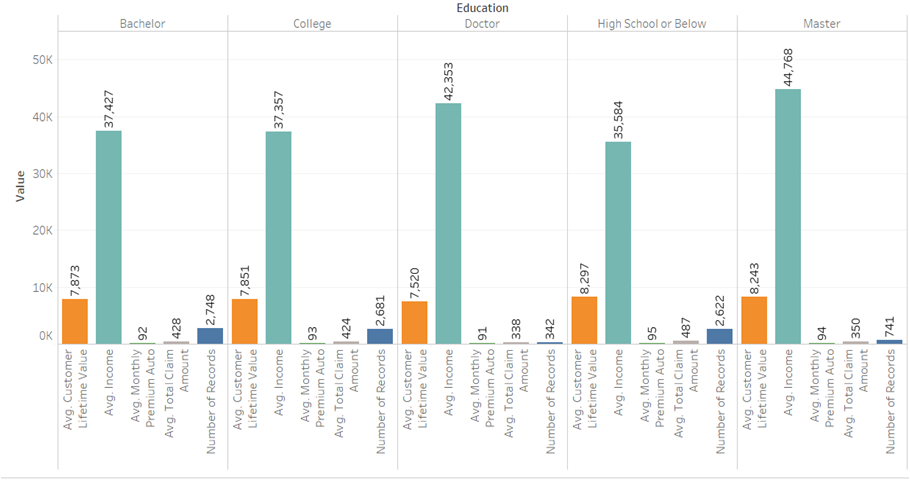

1. People with high school education (or) below have lowest income but interestingly they have highest clv probably because their monthly premium auto highest. Also, their total claim amount is highest.
2. People with master's degree have lesser claim amount but high premium and clv. A potential profitable group to target (since no. of records for this group is less)

### Employement Status

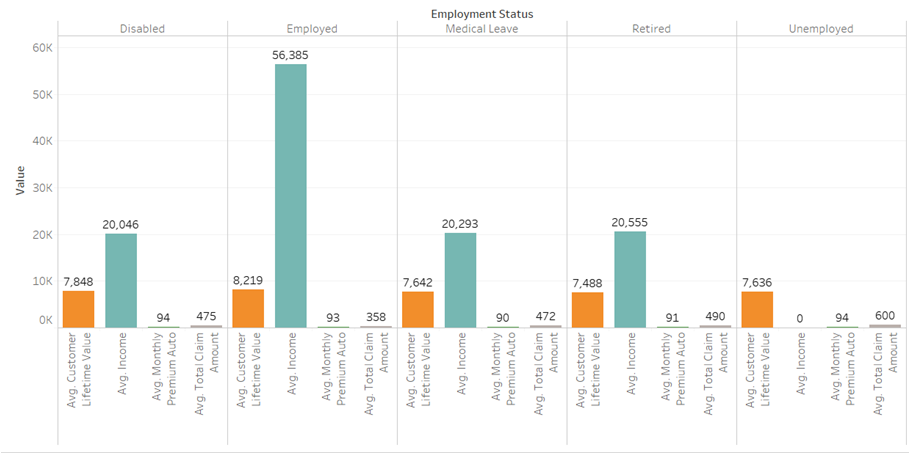

1. Even though the unemployed people have no income, their monthly premium and CLV is on par with others.
2. Employed people are paying high premium but their claim amount is lowest. So they are the potential target group because they are paying more and claiming less

### State and Location Code

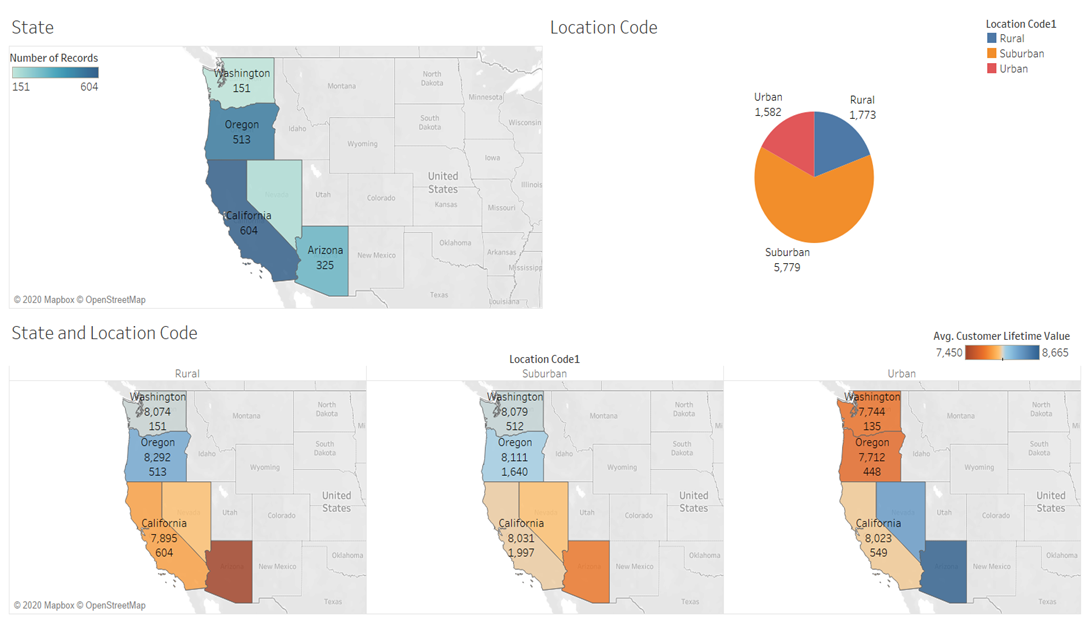

1. Majority of the customer base of the company is from Suburban region of the states.

2. Company can target customers in the urban region of Arizona and Nevada since the average CLV of customers from that area is the highest.

### Vehicle Class

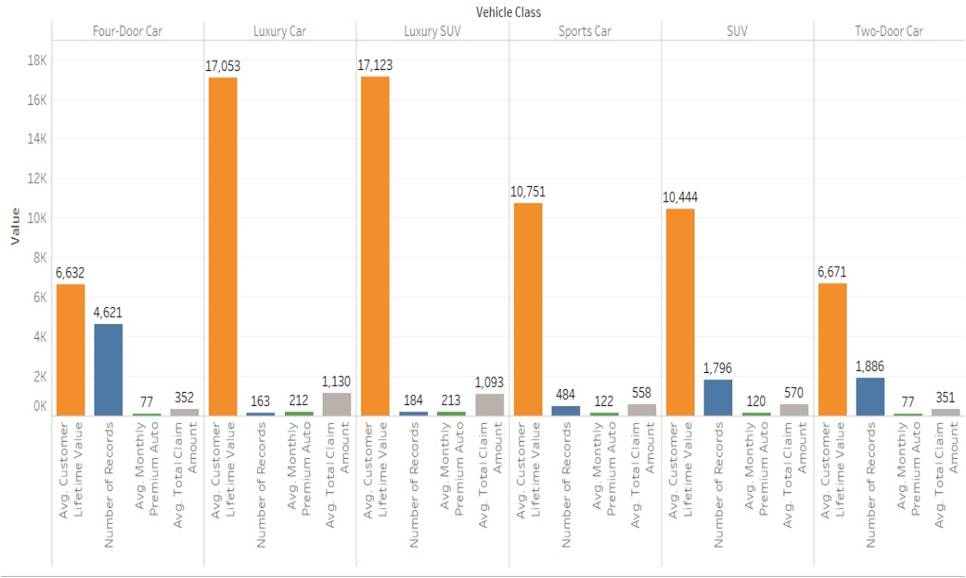

1. Customers who have taken Luxury Vehicles pay more monthly premium for their vehicles and they are considered more valuable than others.
2. This proves the positive correlation of 0.4 between Monthly Premium Auto and CLV.
3. Most of the people prefers Four Door Car.

### Sales Channel

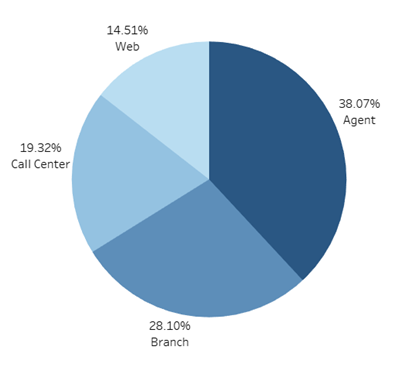

Most of the people are converted to customers by agents. So, company can invest more in agents.

### Data Preprocessing

In [ ]:
y = df['Customer Lifetime Value']
df1.head()

In [ ]:
df1 = pd.get_dummies(df1,drop_first=True)
df1.shape

In [ ]:
num_features = df.dtypes[df.dtypes != 'object'].index
skewed_feat = df[num_features].apply(lambda x: x.skew()).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feat,columns = ['skew'])
skewness

### It is important to transform the skewed features before applying linear models.

In [ ]:
from scipy.special import boxcox1p
skewness_feat = ['Monthly Premium Auto','Total Claim Amount']
lam = 0.15
for i in skewness_feat:
    df1[i] = boxcox1p(df1[i],lam)

## Modelling

### Let's start with the base linear model without doing any transformation and feature elimination and check the score of R2

In [ ]:
import statsmodels.api as sm
Xc = sm.add_constant(df1)
model = sm.OLS(y,Xc).fit()
model.summary()

### We got a very low r2 value of 0.170, it proves that our conclusion from the scatterplot that the linear model will not work well for this dataset is true

### Let's check the score after transforming target variable

In [ ]:
y_transformed = np.log1p(y)
model2 = sm.OLS(y_transformed,Xc).fit()
model2.summary()

### The r2 value increased by just 10%

### Let's apply ols model after applying polynomial features. Among the continuous features that we have 'Total Claim Amount','Monthly Premium Auto' are the only features which are heteroscedastic in nature. So we will be using these features for polynomial regression.

In [ ]:
X_up = df1[['Total Claim Amount','Monthly Premium Auto']]
from sklearn.preprocessing import PolynomialFeatures
qr = PolynomialFeatures(degree = 3)
x_qr = qr.fit_transform(X_up)
x_main = pd.DataFrame(x_qr)
x_main.head()

In [ ]:
df2= pd.concat([df1,x_main.iloc[:,3:]],axis = 1)
df2.head()

In [ ]:
Xc = sm.add_constant(df2)
model3 = sm.OLS(y_transformed,Xc).fit()
model3.summary()

### There isn't any appreciable increase in r2.

1. ### So it's better to go for non linear models. I have splitted the dataset in 70:30 ratio.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1,y_transformed,test_size = 0.3,random_state=4)

 ## Decision Tree Regressor

### I did the hyperparameter tuning using Randomized search CV and best parameters that I got is mentioned in the dt_tuned model. 

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
dtc = DecisionTreeRegressor()

params = {'max_depth': sp_randint(2,20),'min_samples_leaf': sp_randint(1,20),
         'min_samples_split': sp_randint(2,40)}

rsearch = RandomizedSearchCV(dtc,param_distributions=params,n_iter=100,cv =10, scoring = 'r2')
rsearch.fit(df1,y)

In [ ]:
from sklearn.linear_model import Lasso,ElasticNet,LassoLarsIC,BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR

In [ ]:
dt = DecisionTreeRegressor()
dt_tuned = DecisionTreeRegressor(max_depth =  8, min_samples_leaf =  18, min_samples_split = 22)
dt_bag = BaggingRegressor(base_estimator=dt_tuned,n_estimators=10,random_state=0)
dt_boost = AdaBoostRegressor(base_estimator=dt_tuned,n_estimators=50,random_state=0)

In [ ]:
for model,name in zip([dt,dt_tuned,dt_bag,dt_boost],['decision_tree','dt_tuned','dt_bag','dt_boost']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)
    print('*'*60)

In [ ]:
X_imp=pd.DataFrame(dt_tuned.feature_importances_,columns=['Imp'],index=x_test.columns)
X_imp=X_imp.sort_values(by='Imp',ascending=False)
plt.figure(figsize=(250,50))
plt.xlabel('Feature Names',fontsize=80)
plt.xticks(rotation=90,fontsize=150)
sns.barplot(x=X_imp.index,y=X_imp['Imp'])
X_imp.T

## Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
rf_tuned = RandomForestRegressor(max_depth =  36,max_features = 25,min_samples_leaf = 2,min_samples_split = 7,n_estimators=432)

In [ ]:
for model,name in zip([rf,rf_tuned],['Random Forest','Random Forest Tuned']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)
    print('*'*60)

In [ ]:
X_imp=pd.DataFrame(rf_tuned.feature_importances_,columns=['Imp'],index=x_test.columns)
X_imp=X_imp.sort_values(by='Imp',ascending=False)
plt.figure(figsize=(250,50))
plt.xlabel('Feature Names',fontsize=80)
plt.xticks(rotation=90,fontsize=150)
sns.barplot(x=X_imp.index,y=X_imp['Imp'])
X_imp.T

## GradientBoost

In [ ]:
gboost = GradientBoostingRegressor(n_estimators=1000)

In [ ]:
for model,name in zip([gboost],['Gradient Boost']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)

## LightGBM Regressor

In [ ]:
model_lgb = lgb.LGBMRegressor()
model_lgb_tuned = lgb.LGBMRegressor(n_estimators=43)

In [ ]:
for model,name in zip([model_lgb,model_lgb_tuned],['Light GBM','Light GBM Tuned']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)
    print('*'*60)

## XGBoost Regressor

In [ ]:
model_xgb = xgb.XGBRegressor()
model_xgb_tuned = xgb.XGBRegressor(learning_rate = 0.1,max_depth= 6,min_child_weight= 4,n_estimators= 70)

In [ ]:
for model,name in zip([model_xgb,model_xgb_tuned],['XG Boost','XG Boost Tuned']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)
    print('*'*60)

## CatBoost Regressor

In [ ]:
from catboost import CatBoostClassifier, CatBoostRegressor
cat_boost =CatBoostRegressor(iterations = 100,
            learning_rate = 0.05,
            eval_metric = "R2",
            verbose = False)

In [ ]:
cat_boost.fit(x_train,y_train)
pred = cat_boost.predict(x_test)
pred1 = cat_boost.predict(x_train)
r2_train = r2_score(y_train,pred1)
r2_test = r2_score(y_test,pred)
mape = (abs((pred-y_test)/y_test).mean())*100
print('train r2:',r2_train)
print('test r2:',r2_test)
print('Mape: {}'.format(mape))

## Stacking

In [ ]:
class AveragingModels(BaseEstimator,RegressorMixin,TransformerMixin):
    def __init__(self,models):
        self.models = models
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions,axis = 1)

In [ ]:
averaged_models = AveragingModels(models =  (rf_tuned,model_lgb_tuned,gboost))
averaged_models.fit(x_train,y_train)
pred = averaged_models.predict(x_test)
pred1 = averaged_models.predict(x_train)
r2_train = r2_score(y_train,pred1)
r2_test = r2_score(y_test,pred)
mape = (abs((pred-y_test)/y_test).mean())*100
print('AveragingModels test score: {}' .format(rmse_test))
print('train r2:',r2_train)
print('test r2:',r2_test)
print('Mape: {}'.format(mape))

## Among all the models I have applied Random Forest is Performing best